<img src="./image/25.png">

<img src="./image/26.png">

<img src="./image/27.png">

<img src="./image/28.png">

In [5]:
import qiskit, numpy as np
import base
thetas_origin = np.random.uniform(low=0, high=2*np.pi, size=(3,))
thetas_x, thetas_z, thetas_y = thetas_origin
def u(qc, thetas):
    qc.rx(thetas[0], 0)
    qc.rz(thetas[1], 1)
    qc.cry(thetas[2], 0, 1)
    return qc
def udagger(qc, thetas):
    qc.cry(-thetas[2], 0, 1)
    qc.rz(-thetas[1], 1)
    qc.rx(-thetas[0], 0)
    return qc
def cost_function(thetas):
    qc = qiskit.QuantumCircuit(2,2)
    qc = u(qc, thetas)
    qc = udagger(qc, thetas_origin)
    return base.measure(qc, [0, 1])
    
g = np.zeros((3,3), dtype=np.complex128)

g[0, 0] = -1/2*base.second_derivative_2psr(cost_function, thetas_origin, 0, 0)
g[1, 1] = -1/2*base.second_derivative_2psr(cost_function, thetas_origin, 1, 1)
g[2, 2] = -1/2*base.second_derivative_4psr(cost_function, thetas_origin, 2, 2)
print(1/(4*((thetas_x)**2)))
print(g)

0.009647829433721845
[[ 0.25001667+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.06805363-0.j]]


Statevector([1.00000000e+00+0.00000000e+00j,
             0.00000000e+00-5.55111512e-17j,
             4.81804622e-18+1.96983161e-17j,
             7.49788795e-18-1.83392177e-18j],
            dims=(2, 2))


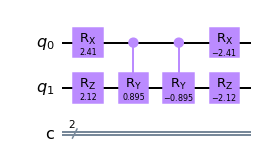

In [41]:
thetas = np.random.uniform(low=0, high=2*np.pi, size=(3,))
qc = qiskit.QuantumCircuit(2,2)
qc = u(qc, thetas_origin)
qc = udagger(qc, thetas)
print(qiskit.quantum_info.Statevector(qc))
qc.draw('mpl')